In [1]:
!pip install vn_telex
!pip install underthesea
!pip install viet_text_tools

ERROR: Could not find a version that satisfies the requirement vn_telex (from versions: none)
ERROR: No matching distribution found for vn_telex
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00


# Bảng đánh dấu

In [2]:
import pandas as pd

BANG_DANH_DAU = {
    "telex": {
                   "Á": "AS" , "À": "AF" , "Ả": "AR" , "Ã": "AX" , "Ạ": "AJ" ,
        "Ă": "AW", "Ắ": "AWS", "Ằ": "AWF", "Ẳ": "AWR", "Ẵ": "AWX", "Ặ": "AWJ",
        "Â": "AA", "Ấ": "AAS", "Ầ": "AAF", "Ẩ": "AAR", "Ẫ": "AAX", "Ậ": "AAJ",
        "Đ": "DD",
                   "É": "ES" , "È": "EF" , "Ẻ": "ER" , "Ẽ": "EX" , "Ẹ": "EJ" ,
        "Ê": "EE", "Ế": "EES", "Ề": "EEF", "Ể": "EER", "Ễ": "EEX", "Ệ": "EEJ",
                   "Í": "IS" , "Ì": "IF" , "Ỉ": "IR" , "Ĩ": "IX" , "Ị": "IJ" ,
                   "Ó": "OS" , "Ò": "OF" , "Ỏ": "OR" , "Õ": "OX" , "Ọ": "OJ" ,
        "Ô": "OO", "Ố": "OOS", "Ồ": "OOF", "Ổ": "OOR", "Ỗ": "OOX", "Ộ": "OOJ",
        "Ơ": "OW", "Ớ": "OWS", "Ờ": "OWF", "Ở": "OWR", "Ỡ": "OWX", "Ợ": "OWJ",
                   "Ú": "US" , "Ù": "UF" , "Ủ": "UR" , "Ũ": "UX" , "Ụ": "UJ" ,
        "Ư": "UW", "Ứ": "UWS", "Ừ": "UWF", "Ử": "UWR", "Ữ": "UWX", "Ự": "UWJ",
                   "Ý": "YS" , "Ỳ": "YF" , "Ỷ": "YR" , "Ỹ": "YX" , "Ỵ": "YJ" ,
                   "á": "as" , "à": "af" , "ả": "ar" , "ã": "ax" , "ạ": "aj" ,
        "ă": "aw", "ắ": "aws", "ằ": "awf", "ẳ": "awr", "ẵ": "awx", "ặ": "awj",
        "â": "aa", "ấ": "aas", "ầ": "aaf", "ẩ": "aar", "ẫ": "aax", "ậ": "aaj",
        "đ": "dd",
                   "é": "es" , "è": "ef" , "ẻ": "er" , "ẽ": "ex" , "ẹ": "ej" ,
        "ê": "ee", "ế": "ees", "ề": "eef", "ể": "eer", "ễ": "eex", "ệ": "eej",
                   "í": "is" , "ì": "if" , "ỉ": "ir" , "ĩ": "ix" , "ị": "ij" ,
                   "ó": "os" , "ò": "of" , "ỏ": "or" , "õ": "ox" , "ọ": "oj" ,
        "ô": "oo", "ố": "oos", "ồ": "oof", "ổ": "oor", "ỗ": "oox", "ộ": "ooj",
        "ơ": "ow", "ớ": "ows", "ờ": "owf", "ở": "owr", "ỡ": "owx", "ợ": "owj",
                   "ú": "us" , "ù": "uf" , "ủ": "ur" , "ũ": "ux" , "ụ": "uj" ,
        "ư": "uw", "ứ": "uws", "ừ": "uwf", "ử": "uwr", "ữ": "uwx", "ự": "uwj",
                   "ý": "ys" , "ỳ": "yf" , "ỷ": "yr" , "ỹ": "yx" , "ỵ": "yj" ,
    }
}

def xoa_dau_sang_telex(txt: str, kieu_go: str) -> str:
    kieu_go = kieu_go.lower()
    if kieu_go not in BANG_DANH_DAU:
        raise Exception("kiểu gõ ko hợp lệ")
    for k, v in BANG_DANH_DAU[kieu_go].items():
        txt = txt.replace(k, v)
    return txt

txt = "Đạo đức kinh"
xoa_dau_sang_telex(txt, "telex") # "“DDajo dduwsc kinh”"

'DDajo dduwsc kinh'

In [3]:
txt = "Đaỏo đức kinh"
xoa_dau_sang_telex(txt, "telex") # "“DDajo dduwsc kinh”"

'DDaoro dduwsc kinh'

# Loại bỏ nhiễu, emoji

In [4]:
import re
import emoji

def remove_noise(text):
    # Loại bỏ emoji
    text = emoji.replace_emoji(text, replace='')
    # Loại bỏ ký tự xuống dòng và các ký tự không cần thiết
    text = re.sub(r'[\n\r\t]', ' ', text)
    return text


# Chuyển hóa thành chữ thường

In [5]:
def to_lowercase(text):
    return text.lower()

# Chuẩn hóa dấu (ví dụ: "cuả" → "của")

In [6]:
from viet_text_tools import normalize_diacritics

def normalize_marks(text):
    return normalize_diacritics(text)

# cuả -> cuar -> của

In [7]:
normalize_marks("cuả") 

'của'

In [8]:
normalize_marks("tiêủtịên") 

'tiểutiện'

In [9]:
txt = "Đaỏ"
normalize_marks(txt)

'Đảo'

# Load từ điển và tính tần suất từ

In [10]:
!wget https://raw.githubusercontent.com/undertheseanlp/underthesea/refs/heads/main/underthesea/corpus/data/Viet74K.txt

--2025-06-25 12:01:42--  https://raw.githubusercontent.com/undertheseanlp/underthesea/refs/heads/main/underthesea/corpus/data/Viet74K.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988627 (965K) [text/plain]
Saving to: ‘Viet74K.txt’

Viet74K.txt         100%[===================>] 965.46K  --.-KB/s    in 0.05s   

2025-06-25 12:01:42 (19.8 MB/s) - ‘Viet74K.txt’ saved [988627/988627]



In [11]:
from collections import defaultdict

def load_words_from_txt(file_path):
    word_freq = defaultdict(int)
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            word = line.strip()
            if word:
                word_freq[word.lower()] += 1  # Gán tần suất mặc định là 1
    return word_freq.items()


# Tách từ bị dính (ví dụ: "làmviệc" → "làm việc")

In [12]:
from functools import lru_cache
from math import prod

def splits(text, L=20):
    return [(text[:i+1], text[i+1:]) for i in range(min(len(text), L))]

@lru_cache(maxsize=None)
def segment(text):
    if not text:
        return []
    candidates = ([first] + segment(rem) for first, rem in splits(text))
    return max(candidates, key=Pwords)

def Pwords(words):
    return prod(Pw(w) for w in words)

In [13]:
class Pdist(dict):
    def __init__(self, data, N=None, missingfn=None):
        for key, count in data:
            self[key] = self.get(key, 0) + int(count)
        self.N = float(N or sum(self.values()))
        self.missingfn = missingfn or (lambda k, N: 1. / N)

    def __call__(self, key):
        if key in self:
            return self[key] / self.N
        else:
            return self.missingfn(key, self.N)

def avoid_long_words(word, N):
    return 10. / (N * 10 ** len(word))


In [14]:
word_data = load_words_from_txt('Viet74K.txt')
Pw = Pdist(word_data, missingfn=avoid_long_words)

# Segment thử từ bị dính liền
#text = "quantrọnglàsứckhỏe"
text = "làmviệc"
print(" ".join(segment(text)))


làm việc


In [15]:
print("có" in Pw)      # True
print("được" in Pw)    # True

True
True


In [16]:
import math
import re

def logP(word):
    prob = Pw(word)
    return math.log(prob) if prob > 0 else float('-inf')
    
def is_valid_segmentation(words):
    # Mỗi từ phải nằm trong từ điển và độ dài tối thiểu 2 (trừ những từ hợp lệ ngắn)
    for w in words:
        if w not in Pw:
            return False
        if len(w) == 1 and w not in {"a", "i", "ở", "ê", "ô"}:  # giữ lại các từ 1 ký tự có nghĩa thật
            return False
    return True
    
def split_merged_token(token, ratio_threshold=1):
    """
    Nếu token không có khoảng trắng và không có trong từ điển,
    dùng segment() để thử tách. So sánh trực tiếp xác suất tổng của các từ tách ra.
    """
    if token in Pw or " " in token:
        return [token]

    segmented = segment(token)
    prob_segmented = Pwords(segmented)
    # print(prob_segmented)
    prob_original = Pw(token)
    # print(prob_original)

    if (prob_segmented > ratio_threshold * prob_original) and is_valid_segmentation(segmented):
        return segmented
    else:
        return [token]


def segment_sentence(sentence):
    words = []
    for token in sentence.split():
        raw_token = token
        segmented = split_merged_token(raw_token)

        if segmented == [raw_token]:
            words.append(raw_token)  # giữ nguyên token gốc nếu không thể tách hoặc không cần
        else:
            words.extend(segmented)
    return " ".join(words)


In [17]:
# Câu gồm cả từ đúng và từ dính liền
text = "hạnhphúc"

print(segment_sentence(text))
# → bảo rộng quan trọng và sức khỏe là hạnh phúc

hạnh phúc


In [18]:
segment_sentence("vaàhệ")

'vaàhệ'

In [19]:
segment_sentence("tranhh")

'tranhh'

In [20]:
segment_sentence("cóđược")

'có được'

In [21]:
print(segment("cóđược"))

['có', 'được']


In [22]:
Pw("cóđược")

1.353161662223786e-10

In [23]:
Pw("có")

1.3531616622237858e-05

In [24]:
Pw("được")

1.3531616622237858e-05

In [25]:
segment_sentence("Nghiên cứu cụ thể hóa giải pháp về đổi mới cơ chế, chính sách vào điều kiện đặc thù của tỉnh, để khuyến khích các doanh nghiệp thuộc các thành phần kinh tế trên địa bàn phát triển nhanh, bềnvững.")

'Nghiên cứu cụ thể hóa giải pháp về đổi mới cơ chế, chính sách vào điều kiện đặc thù của tỉnh, để khu yến khích các doanh nghiệp thuộc các thành phần kinh tế trên địa bàn phát triển nhanh, bềnvững.'

# load từ điển và cài trie

In [26]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    # Thêm từ vào Trie
    def insert(self, word):
        node = self.root
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
        node.is_end_of_word = True

    # Kiểm tra từ có trong Trie không
    def search(self, word):
        node = self.root
        for ch in word:
            if ch not in node.children:
                return False
            node = node.children[ch]
        return node.is_end_of_word

    # Kiểm tra prefix có tồn tại không
    def starts_with(self, prefix):
        node = self.root
        for ch in prefix:
            if ch not in node.children:
                return False
            node = node.children[ch]
        return True


In [27]:
trie = Trie()

with open("Viet74K.txt", "r", encoding="utf-8") as f:
    for line in f:
        word = line.strip()
        if word:
            trie.insert(word)


In [28]:
trie.search("nhiên")

False

In [29]:
trie.search("được")

True

In [30]:
trie.insert("nhiên")

In [31]:
trie.insert("khuyến")

# Ghép các âm tiết bị tách rời (ví dụ: "g i á o" → "giáo")

In [32]:
import re

def merge_separated_syllables(text, trie):
    # --- Tiền xử lý: Tách dấu câu ra khỏi chữ ---
    punctuations = r"([.,!?;:])"
    text = re.sub(punctuations, r' \1 ', text)      # tách dấu câu ra
    text = re.sub(r'\s{2,}', ' ', text).strip()

    syllables = text.split()
    i = 0
    merged = []

    while i < len(syllables):
        j = i
        best_match = syllables[i]
        end_index = i + 1

        while j < len(syllables):
            candidate = ' '.join(syllables[i:j+1])
            candidate_no_space = ''.join(syllables[i:j+1])

            if trie.search(candidate):  # Ưu tiên cụm từ có khoảng trắng hợp lệ
                best_match = candidate
                end_index = j + 1
            elif trie.search(candidate_no_space):
                best_match = candidate_no_space
                end_index = j + 1

            if not trie.starts_with(candidate) and not trie.starts_with(candidate_no_space):
                break

            j += 1

        merged.append(best_match)
        i = end_index

    # --- Hậu xử lý: Gộp lại dấu câu đúng định dạng ---
    result = ' '.join(merged)
    result = re.sub(r'\s+([.,!?;:])', r'\1', result)  # Xóa khoảng trắng trước dấu câu
    result = re.sub(r'\s{2,}', ' ', result).strip()  # Rút gọn khoảng trắng thừa

    return result

In [33]:
text = "g iá o d ục môi trường"
merged = merge_separated_syllables(text, trie)
print(merged)  # → giáo dục môi trường


giáo dục môi trường


In [34]:
merge_separated_syllables("bê tông", trie)

'bê tông'

In [35]:
merge_separated_syllables("tranhh", trie)

'tranhh'

In [36]:
merge_separated_syllables("tuy nh iên, mục tiêu của p4 là còn có thể tái cấu hình với cả các asic có chức năng cố định.", trie)

'tuy nhiên, mục tiêu của p4 là còn có thể tái cấu hình với cả các asic có chức năng cố định.'

In [37]:
merge_separated_syllables("để có được một định nghĩa khái quát nhất về ngành công nghiệp rong biển đầu tiên cần xét đến khái niệm ngành công nghiệp.", trie)

'để có được một định nghĩa khái quát nhất về ngành công nghiệp rong biển đầu tiên cần xét đến khái niệm ngành công nghiệp.'

In [38]:
merge_separated_syllables("khu yến khích", trie)

'khuyến khích'

In [39]:
merge_separated_syllables("bền vững", trie)

'bền vững'

# Chuẩn hóa dấu câu

In [40]:
import re
import pandas as pd

def clean_punctuation(text):
    if pd.isnull(text):
        return text

    # 0. Chuẩn hóa dấu ba chấm: xóa khoảng trắng trước/sau
    text = re.sub(r'\s*\.{3}\s*', '...', text)


    # 2. Xóa khoảng trắng trước dấu câu nếu không nằm giữa số
    text = re.sub(r'(?<!\d)\s+([.,!?:;])(?=\D|$)', r'\1', text)

    # 3. Thêm khoảng trắng sau dấu câu nếu liền kề chữ cái (trừ khi giữa số)
    text = re.sub(r'([.,!?:;])(?=\D)', r'\1 ', text)

    # 4. Dấu ba chấm: thêm khoảng trắng sau nếu liền kề chữ
    text = re.sub(r'(\.\.\.)(?=\w)', r'\1 ', text)

    # 4.1 Xử lý các cụm dấu câu lặp lại (ngoại trừ dấu ba chấm '...')
    text = re.sub(r'(?<!\.)[.,!?;:]{2,}(?!\.)', lambda m: m.group(0)[0], text)
    text = re.sub(r'([!?]{2,})', lambda m: m.group(0)[-1], text)
    text = re.sub(r'([.,!?;:])(?=\w)', r'\1 ', text)

    # 5. Dấu ngoặc đơn ()
    text = re.sub(r'\s*\(\s*', '(', text)
    text = re.sub(r'\s*\)\s*', ')', text)
    text = re.sub(r'(?<=[\w])\(', ' (', text)
    text = re.sub(r'\)(?=[\w])', ') ', text)

    # 6. Bỏ hoàn toàn dấu ngoặc kép " và dấu nháy đơn '
    text = re.sub(r'[\'"]', '', text)

    # 7. Rút gọn khoảng trắng thừa
    text = re.sub(r'\s{2,}', ' ', text)

    # 1. Giữ dấu ',' hoặc '.' giữa số (số thập phân)
    text = re.sub(r'(?<=\d)\s*([.,])\s*(?=\d)', r'\1', text)
    
    return text.strip()

# Preprocessing

In [41]:
def preprocess(text):
    # print("=== Original Text ===")
    # print(text)
    # print("---------------------\n")

    # text = remove_noise(text)
    # print("=== After Removing Noise ===")
    # print(text)
    # print("---------------------\n")

    # text = to_lowercase(text)
    # print("=== After Lowercasing ===")
    # print(text)
    # print("---------------------\n")

    # text = normalize_marks(text)
    # print("=== After Normalizing Diacritics ===")
    # print(text)
    # print("---------------------\n")

    # text = segment_sentence(text)
    # print("=== After Word Segmentation ===")
    # print(text)
    # print("---------------------\n")

    # text = merge_separated_syllables(text, trie)
    # print("=== After Merging Separated Syllables ===")
    # print(text)
    # print("---------------------\n")

    text = remove_noise(text)
    text = to_lowercase(text)
    text = normalize_marks(text)
    text = segment_sentence(text)
    text = merge_separated_syllables(text, trie)
    text = clean_punctuation(text)
    return text


In [42]:
original_text = "Thông qua công tác tuyên truyền📢, vận độ/ ng này phụ huynh s ẽ hiểu rõ hơn tầm quantrọng cuả vịêc giáo dục ý thức bảo vệ môi trường cho trẻ không phải chỉ ở phía nhà trường mà còn ở gia đình, góp phần vào việc gìn giữ môi trường sanh, sạch, đẹp."
processed_text = preprocess(original_text)
print(processed_text)

# tieeurtienj

thông qua công tác tuyên truyền, vận độ/ ng này phụ huynh sẽ hiểu rõ hơn tầm quan trọng của việc giáo dục ý thức bảo vệ môi trường cho trẻ không phải chỉ ở phía nhà trường mà còn ở gia đình, góp phần vào việc gìn giữ môi trường sanh, sạch, đẹp.


# Chuẩn bị tập test

In [43]:
import pandas as pd
import json

file_path = '/kaggle/input/vsec-dataset-for-vietnammese-correction-words/VSEC.jsonl'

data = []
with open(file_path, 'r') as f:
    for line in f:
        try:
            json_object = json.loads(line)
            data.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Lỗi khi giải mã JSON ở dòng: {line.strip()}. Lỗi: {e}")
            # Xử lý lỗi hoặc bỏ qua dòng này tùy theo nhu cầu của bạn

df = pd.DataFrame(data)

df.head()

,annotations,text
0,"[{'alternative_syllables': [], 'current_syllab...","Thông qua công tác tuyên truyền, vận động này ..."
1,"[{'alternative_syllables': [], 'current_syllab...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n..."
2,"[{'alternative_syllables': [], 'current_syllab...",Giữ được chỉ số này không giam mà còn tăng thê...
3,"[{'alternative_syllables': ['Đứng'], 'current_...",Đúng trước thực tế này đòi hỏi chúng ta cần ph...
4,"[{'alternative_syllables': [], 'current_syllab...",Trình độ học vấn của nhân viên được tuyển dụng...


In [44]:
df['preprocess'] = df['text'].apply(preprocess)
df.head()

,annotations,text,preprocess
0,"[{'alternative_syllables': [], 'current_syllab...","Thông qua công tác tuyên truyền, vận động này ...","thông qua công tác tuyên truyền, vận động này ..."
1,"[{'alternative_syllables': [], 'current_syllab...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n...","do đó, doanh nghiệp cần chú trọng đến yếu tố n..."
2,"[{'alternative_syllables': [], 'current_syllab...",Giữ được chỉ số này không giam mà còn tăng thê...,giữ được chỉ số này không giam mà còn tăng thê...
3,"[{'alternative_syllables': ['Đứng'], 'current_...",Đúng trước thực tế này đòi hỏi chúng ta cần ph...,đúng trước thực tế này đòi hỏi chúng ta cần ph...
4,"[{'alternative_syllables': [], 'current_syllab...",Trình độ học vấn của nhân viên được tuyển dụng...,trình độ học vấn của nhân viên được tuyển dụng...


In [45]:
output_path = '/kaggle/working/preprocess.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

In [46]:
# Giả sử df là DataFrame ban đầu
def reconstruct_text(annotation_list):
    corrected = []
    for item in annotation_list:
        if item['is_correct']:
            corrected.append(item['current_syllable'])
        else:
            # Lấy phần tử đầu tiên trong alternative_syllables nếu có, nếu không thì để trống
            corrected.append(item['alternative_syllables'][0] if item['alternative_syllables'] else '')
    return ' '.join(corrected)

# Tạo cột mới 'correct_text'
df['correct_text'] = df['annotations'].apply(reconstruct_text)
# Loại bỏ khoảng trắng thừa
df['correct_text'] = df['correct_text'].str.split().str.join(' ')
df['correct_text'] = df['correct_text'].apply(clean_punctuation)

In [47]:
df.head()

,annotations,text,preprocess,correct_text
0,"[{'alternative_syllables': [], 'current_syllab...","Thông qua công tác tuyên truyền, vận động này ...","thông qua công tác tuyên truyền, vận động này ...","Thông qua công tác tuyên truyền, vận động này ..."
1,"[{'alternative_syllables': [], 'current_syllab...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n...","do đó, doanh nghiệp cần chú trọng đến yếu tố n...","Do đó, doanh nghiệp cần chú trọng đến yếu tố n..."
2,"[{'alternative_syllables': [], 'current_syllab...",Giữ được chỉ số này không giam mà còn tăng thê...,giữ được chỉ số này không giam mà còn tăng thê...,Giữ được chỉ số này không giảm mà còn tăng thê...
3,"[{'alternative_syllables': ['Đứng'], 'current_...",Đúng trước thực tế này đòi hỏi chúng ta cần ph...,đúng trước thực tế này đòi hỏi chúng ta cần ph...,Đứng trước thực tế này đòi hỏi chúng ta cần ph...
4,"[{'alternative_syllables': [], 'current_syllab...",Trình độ học vấn của nhân viên được tuyển dụng...,trình độ học vấn của nhân viên được tuyển dụng...,Trình độ học vấn của nhân viên được tuyển dụng...


In [48]:
df.to_csv("full_test.csv", index = False, encoding='utf-8-sig')

In [49]:
df['preprocess_word_count'] = df['preprocess'].apply(lambda x: len(x.split()))
df['correct_text_word_count'] = df['correct_text'].apply(lambda x: len(x.split()))

# Find rows where word counts differ
mismatched_rows = df[df['preprocess_word_count'] != df['correct_text_word_count']]

mismatched_rows[['text', 'preprocess', 'correct_text', 'preprocess_word_count', 'correct_text_word_count']]

,text,preprocess,correct_text,preprocess_word_count,correct_text_word_count
45,aNăng lực rút gọn quá trình lập luận toán học ...,anăng lực rút gọn quá trình lập luận toán học ...,Năng lực rút gọn quá trình lập luận toán học v...,15,16
67,Chủ động tham gia các hoạt động ngoại ngoại kh...,chủ động tham gia các hoạt động ngoại ngoại kh...,Chủ động tham gia các hoạt động ngoại khóa với...,17,16
106,"Theo quy định pháp luật thuế hiện hiện hnhf, b...","theo quy định pháp luật thuế hiện hiện hnhf, b...",Theo quy định pháp luật thuế hiện hành bắt buộ...,18,17
120,"Hơn nữa, để phát triển du lịch văn hóa thì thì...","hơn nữa, để phát triển du lịch văn hóa thì thì...","Hơn nữa, để phát triển du lịch văn hóa thì tài...",20,19
126,Luận án bổ sung vào nguồn tài liệu phục vụ ngh...,luận án bổ sung vào nguồn tài liệu phục vụ ngh...,Luận án bổ sung vào nguồn tài liệu phục vụ ngh...,27,28
...,...,...,...,...,...
9286,Công tắc này được liên kết với công tắc cần gạ...,công tắc này được liên kết với công tắc cần gạ...,Công tắc này được liên kết với công tắc cần gạ...,44,43
9293,Những biến đổi trong điều kiện khí hậu đang ản...,những biến đổi trong điều kiện khí hậu đang ản...,Những biến đổi trong điều kiện khí hậu đang ản...,35,34
9299,Nghiên cứu cụ thể hóa giải pháp về đổi mới cơ ...,nghiên cứu cụ thể hóa giải pháp về đổi mới cơ ...,Nghiên cứu cụ thể hóa giải pháp về đổi mới cơ ...,40,41
9316,"Theo Hair và ctg (2009,116) Mutivariate Data A...","theo hair và ctg (2009,116) mutivariate data a...","Theo Hair và ctg (2009,116) Mutivariate Data A...",35,36


In [50]:
# Tùy chọn hiển thị toàn bộ nội dung trong mỗi ô
pd.set_option('display.max_colwidth', None)

In [51]:
mismatched_rows[['text', 'preprocess', 'correct_text', 'preprocess_word_count', 'correct_text_word_count']]

,text,preprocess,correct_text,preprocess_word_count,correct_text_word_count
45,aNăng lực rút gọn quá trình lập luận toán học vàahệ thống các phép tính.,anăng lực rút gọn quá trình lập luận toán học vaàhệ thống các phép tính.,Năng lực rút gọn quá trình lập luận toán học và hệ thống các phép tính.,15,16
67,Chủ động tham gia các hoạt động ngoại ngoại khóa với các sinh viên khác trong trường.,chủ động tham gia các hoạt động ngoại ngoại khóa với các sinh viên khác trong trường.,Chủ động tham gia các hoạt động ngoại khóa với các sinh viên khác trong trường.,17,16
106,"Theo quy định pháp luật thuế hiện hiện hnhf, bắt buộc phải sử dụng hóa đơn điện tử.","theo quy định pháp luật thuế hiện hiện hnhf, bắt buộc phải sử dụng hóa đơn điện tử.",Theo quy định pháp luật thuế hiện hành bắt buộc phải sử dụng hóa đơn điện tử.,18,17
120,"Hơn nữa, để phát triển du lịch văn hóa thì thì tài nguyên văn hóa là vai trò thứ yếu.","hơn nữa, để phát triển du lịch văn hóa thì thì tài nguyên văn hóa là vai trò thứ yếu.","Hơn nữa, để phát triển du lịch văn hóa thì tài nguyên văn hóa là vai trò thứ yếu.",20,19
126,"Luận án bổ sung vào nguồn tài liệu phục vụ nghiên cứu, học tập, giảing dạy của khoa học chính trị, y đức và y xã hội học.","luận án bổ sung vào nguồn tài liệu phục vụ nghiên cứu, học tập, giảing dạy của khoa học chính trị, y đức vày xã hội học.","Luận án bổ sung vào nguồn tài liệu phục vụ nghiên cứu, học tập, giảng dạy của khoa học chính trị, y đức và y xã hội học.",27,28
...,...,...,...,...,...
9286,Công tắc này được liên kết với công tắc cần gạt nên khi việc được rửa kính được tài xê kích hoạt thì công tắc rửa kính cũng được bật lên và nước sẽ được điều khiển bằng vòi phun vào kính chắn gió.,công tắc này được liên kết với công tắc cần gạt nên khi việc được rửa kính được tài xê kích hoạt thì công tắc rửa kính cũng được bật lên và nước sẽ được điều khiển bằng vòi phun vào kính chắn gió.,Công tắc này được liên kết với công tắc cần gạt nên khi việc rửa kính được tài xế kích hoạt thì công tắc rửa kính cũng được bật lên và nước sẽ được điều khiển bằng vòi phun vào kính chắn gió.,44,43
9293,Những biến đổi trong điều kiện khí hậu đang ảnh hưởng nghiêm trọng đến nông nghiệp do đây là ngành sản xuất chịu sự ảnh hướng lớn đến từ các thời tiết và khí hậu.,những biến đổi trong điều kiện khí hậu đang ảnh hưởng nghiêm trọng đến nông nghiệp do đây là ngành sản xuất chịu sự ảnh hướng lớn đến từ các thời tiết và khí hậu.,Những biến đổi trong điều kiện khí hậu đang ảnh hưởng nghiêm trọng đến nông nghiệp do đây là ngành sản xuất chịu sự ảnh hưởng lớn đến từ thời tiết và khí hậu.,35,34
9299,"Nghiên cứu cụ thể hóa giải pháp về đổi mới cơ chế, chính sách vào điều kiện đặc thù của tỉnh, để khuyến khích các doanh nghiệp thuộc các thành phần kinh tế trên địa bàn phát triển nhanh, bềnvững.","nghiên cứu cụ thể hóa giải pháp về đổi mới cơ chế, chính sách vào điều kiện đặc thù của tỉnh, để khuyến khích các doanh nghiệp thuộc các thành phần kinh tế trên địa bàn phát triển nhanh, bềnvững.","Nghiên cứu cụ thể hóa giải pháp về đổi mới cơ chế, chính sách vào điều kiện đặc thù của tỉnh, để khuyến khích các doanh nghiệp thuộc các thành phần kinh tế trên địa bàn phát triển nhanh, bền vững",40,41
9316,"Theo Hair và ctg (2009,116) Mutivariate Data Analysis, 7 th Edition thì với kích thước mẫu có ý nghĩa thống là 30 thì hệ số tải Factor Loading có thể lấy giá trị từ 0,75.","theo hair và ctg (2009,116) mutivariate data analysis, 7 th edition thì với kích thước mẫu có ý nghĩa thống là 30 thì hệ số tải factor loading có thể lấy giá trị từ 0,75.","Theo Hair và ctg (2009,116) Mutivariate Data Analysis, 7 th Edition thì với kích thước mẫu có ý nghĩa thống kê là 30 thì hệ số tải Factor Loading có thể lấy giá trị từ 0,75.",35,36


In [52]:
import nltk
from nltk.tokenize import word_tokenize

# Nếu chưa có, tải tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
import string
from nltk.tokenize import word_tokenize

def count_different_tokens(preprocess, correct_text):
    def clean_tokens(text):
        tokens = word_tokenize(text.lower())
        # Loại bỏ tất cả dấu câu, bao gồm cả dấu nháy " và '
        punct = set(string.punctuation) | {'“', '”', '‘', '’', '"', "'"}
        return [t for t in tokens if t not in punct]

    pre_tokens = clean_tokens(preprocess)
    corr_tokens = clean_tokens(correct_text)

    min_len = min(len(pre_tokens), len(corr_tokens))
    diff_count = sum(1 for i in range(min_len) if pre_tokens[i] != corr_tokens[i])
    diff_count += abs(len(pre_tokens) - len(corr_tokens))

    return diff_count

In [54]:
import pandas as pd

df["diff_word_count"] = df.apply(
    lambda row: count_different_tokens(row["preprocess"], row["correct_text"]),
    axis=1
)

In [55]:
df_matched = df[df['preprocess_word_count'] == df['correct_text_word_count']]
df_matched

annotations  \
0                                                                                                                                                                                       [{'alternative_syllables': [], 'current_syllable': 'Thông', 'id': 1, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'qua', 'id': 2, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'công', 'id': 3, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'tác', 'id': 4, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'tuyên', 'id': 5, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'truyền,', 'id': 6, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'vận', 'id': 7, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'động', 'id': 8, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'này', 'id': 9, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'phụ', 'id': 10, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'huynh', 'id': 11, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'sẽ', 'id': 12, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'hiểu', 'id': 13, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'rõ', 'id': 14, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'hơn', 'id': 15, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'tầm', 'id': 16, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'quan', 'id': 17, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trọng', 'id': 18, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'của', 'id': 19, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'việc', 'id': 20, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'giáo', 'id': 21, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'dục', 'id': 22, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'ý', 'id': 23, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'thức', 'id': 24, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'bảo', 'id': 25, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'vệ', 'id': 26, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'môi', 'id': 27, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trường', 'id': 28, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'cho', 'id': 29, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trẻ', 'id': 30, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'không', 'id': 31, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'phải', 'id': 32, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'chỉ', 'id': 33, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'ở', 'id': 34, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'phía', 'id': 35, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'nhà', 'id': 36, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trường', 'id': 37, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'mà', 'id': 38, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'còn', 'id': 39, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'ở', 'id': 40, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'gia', 'id': 41, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'đình', 'id': 42, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': ',', 'id': 43, 'is_correct': True}, {'alter

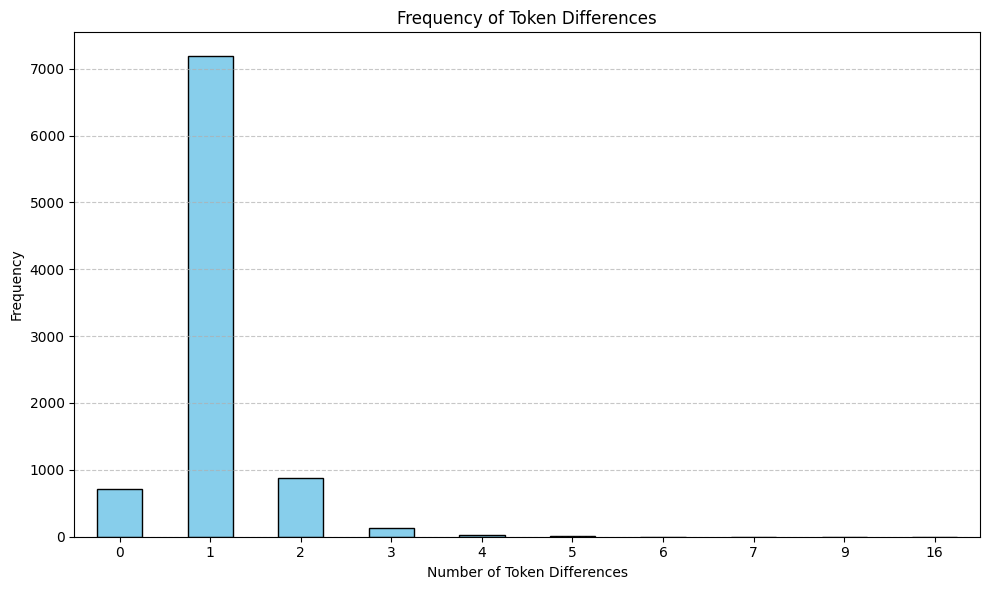

In [56]:
import matplotlib.pyplot as plt

# Đếm tần suất xuất hiện của từng giá trị trong diff_word_count
value_counts = df_matched['diff_word_count'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Frequency of Token Differences')
plt.xlabel('Number of Token Differences')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
df_matched[df_matched['diff_word_count'] > 3][['text', 'preprocess', 'correct_text', 'preprocess_word_count', 'correct_text_word_count', 'diff_word_count']]

,text,preprocess,correct_text,preprocess_word_count,correct_text_word_count,diff_word_count
144,"Giáo viên ghi lên ảng các âm, tiếng, từ mà các ạn chưa tiếp thu kịp ở ài học trước và yêu cầu an cán sự lớp cho các ạn yếu đọc.","giáo viên ghi lên ảng các âm, tiếng, từ mà các ạn chưa tiếp thu kịp ở ài học trước và yêu cầu an cán sự lớp cho các ạn yếu đọc.","Giáo viên ghi lên bảng các âm, tiếng, từ mà các bạn chưa tiếp thu kịp ở bài học trước và yêu cầu ban cán sự lớp cho các bạn yếu đọc.",32,32,5
681,"Các em không dễ tin, không dế chấp nhận ý kiến người khác, muốn tranh luận, chứng mình vấn đề một cách sát thực, rõ ràng, thậm chí đôi khi muốn phê phán những kết luận, những phán đoán của nguời khác.","các em không dễ tin, không dế chấp nhận ý kiến người khác, muốn tranh luận, chứng mình vấn đề một cách sát thực, rõ ràng, thậm chí đôi khi muốn phê phán những kết luận, những phán đoán của nguời khác.","Các em không dễ tin, không dễ chấp nhận ý kiến người khác, muốn tranh luận, chứng minh vấn đề một cách xác thực, rõ ràng, thậm chí đôi khi muốn phê phán những kết luận, những phán đoán của người khác.",42,42,4
813,Báo cáo thực tập GVHD: Trần Tuấn Anh Đối tương nghiện cứu của đề tài là Các chính sách bán hàng của công ty cổ phần thương mại và dịch vụ Katsuma chi nhánh Gia Lai và giải pháp thể cải thiện cách chính sách đó.,báo cáo thực tập gvhd: trần tuấn anh đối tương nghiện cứu của đề tài là các chính sách bán hàng của công ty cổ phần thương mại và dịch vụ katsuma chi nhánh gia lai và giải pháp thể cải thiện cách chính sách đó.,Báo cáo thực tập GVHD: Trần Tuấn Anh Đối tượng nghiên cứu của đề tài là Các chính sách bán hàng của công ty cổ phần thương mại và dịch vụ Katsuma chi nhánh Gia Lai và giải pháp để cải thiện các chính sách đó.,46,46,4
1180,"Ước tính của các chuyên gia ngành thuế Hà Nội cho rằng Keangnam Vina đã trả lãi xuất trung bình khoản 12% mỗi năm cho khẳn vay này, nhưng trong khi đó, lãi suất vay bằng USD tại Việt Nam trong thời điểm đó chỉ giao động hkar từ 5% - 7% mỗi năm.","ước tính của các chuyên gia ngành thuế hà nội cho rằng keangnam vina đã trả lãi xuất trung bình khoản 12% mỗi năm cho khẳn vay này, nhưng trong khi đó, lãi suất vay bằng usd tại việt nam trong thời điểm đó chỉ giao động hkar từ 5% - 7% mỗi năm.","Ước tính của các chuyên gia ngành thuế Hà Nội cho rằng Keangnam Vina đã trả lãi suất trung bình khoảng 12% mỗi năm cho khoản vay này, nhưng trong khi đó, lãi suất vay bằng USD tại Việt Nam trong thời điểm đó chỉ dao động khoảng từ 5% - 7% mỗi năm.",54,54,5
1201,"Phổi hợp với Sở Kế hoạch Đầu tư xây dựng kế hoạch, cân đối bổ trí vổn hàng năm để đầu tư hạ tầng du lịch cho các khu, điểm du lịch cùa tinh.","phổi hợp với sở kế hoạch đầu tư xây dựng kế hoạch, cân đối bổ trí vổn hàng năm để đầu tư hạ tầng du lịch cho các khu, điểm du lịch cùa tinh.","Phối hợp với Sở Kế hoạch Đầu tư xây dựng kế hoạch, cân đối bố trí vốn hàng năm để đầu tư hạ tầng du lịch cho các khu, điểm du lịch của tỉnh.",34,34,5
1208,"Sổ ngày rét hại trung bình năm ở tình Hưng Yên ở 4 kịch bản có xu thế giảm với thời kỳ cơ sở, giảm ít nhất là 2,6 ngày, giảm nhiêu nhât là 11,2 ngày.","sổ ngày rét hại trung bình năm ở tình hưng yên ở 4 kịch bản có xu thế giảm với thời kỳ cơ sở, giảm ít nhất là 2,6 ngày, giảm nhiêu nhât là 11,2 ngày.","Số ngày rét hại trung bình năm ở tỉnh Hưng Yên ở 4 kịch bản có xu thế giảm với thời kỳ cơ sở, giảm ít nhất là 2,6 ngày, giảm nhiều nhất là 11,2 ngày.",36,36,4
1651,"Như vậy với việ apsd ụng hóa đơn điện tử trong thời gian tới sẽ giuos các cơ quan thuế dễ dàng, thuận tiện hơn trong việc tổng họp, kiểm tra thông tin.","như vậy với việ apsd ụng hóa đơn điện tử trong thời gian tới sẽ giuos các cơ quan thuế dễ dàng, thuận tiện hơn trong việc tổng họp, kiểm tra thông tin.","Như vậy với việc áp dụng hóa đơn điện tử trong thời gian tới sẽ giúp các cơ quan thuế dễ dàng, thuận tiện hơn trong việc tổng hợp, kiểm tra thông tin.",33,33,5
1756,"Chú ý cua các em thể hiện sư lưạ chọn rất rõ, sưc tập trung chú ý cao hơn, khả năng duy t

In [58]:
df_matched = df_matched.drop(index=[3949, 5843]).reset_index(drop=True)
df_matched

annotations  \
0                                                                                                                                                                                       [{'alternative_syllables': [], 'current_syllable': 'Thông', 'id': 1, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'qua', 'id': 2, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'công', 'id': 3, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'tác', 'id': 4, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'tuyên', 'id': 5, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'truyền,', 'id': 6, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'vận', 'id': 7, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'động', 'id': 8, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'này', 'id': 9, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'phụ', 'id': 10, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'huynh', 'id': 11, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'sẽ', 'id': 12, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'hiểu', 'id': 13, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'rõ', 'id': 14, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'hơn', 'id': 15, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'tầm', 'id': 16, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'quan', 'id': 17, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trọng', 'id': 18, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'của', 'id': 19, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'việc', 'id': 20, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'giáo', 'id': 21, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'dục', 'id': 22, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'ý', 'id': 23, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'thức', 'id': 24, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'bảo', 'id': 25, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'vệ', 'id': 26, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'môi', 'id': 27, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trường', 'id': 28, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'cho', 'id': 29, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trẻ', 'id': 30, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'không', 'id': 31, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'phải', 'id': 32, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'chỉ', 'id': 33, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'ở', 'id': 34, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'phía', 'id': 35, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'nhà', 'id': 36, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'trường', 'id': 37, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'mà', 'id': 38, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'còn', 'id': 39, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'ở', 'id': 40, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'gia', 'id': 41, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': 'đình', 'id': 42, 'is_correct': True}, {'alternative_syllables': [], 'current_syllable': ',', 'id': 43, 'is_correct': True}, {'alter

In [59]:
df_matched[["text", "preprocess", "correct_text"]].to_csv("test.csv", index = False)

# Chuẩn bị tập train

In [60]:
train = pd.read_json("/kaggle/input/errors-generator/Corpus_text.jsonl", lines = True)

In [61]:
train['preprocess_word_count'] = train['text'].apply(lambda x: len(x.split()))
train['correct_text_word_count'] = train['correct_text'].apply(lambda x: len(x.split()))

# Find rows where word counts differ
train = train[train['preprocess_word_count'] == train['correct_text_word_count']]

train

,text,correct_text,preprocess_word_count,correct_text_word_count
0,Chây ì nộp phạt nguội.,Chây ì nộp phạt nguội.,5,5
1,Chây ì ngộp phạt nguội.,Chây ì nộp phạt nguội.,5,5
3,Chây i nộp phạt ngội.,Chây ì nộp phạt nguội.,5,5
5,"Hàng chục ngàn phươngg tiện bị ghi hình iv phạm luật giao thông ở TP.HCM, bị 'bêu tên' nhưng chủ vẫn không chịu nộp phạt.","Hàng chục ngàn phương tiện bị ghi hình vi phạm luật giao thông ở TP.HCM, bị 'bêu tên' nhưng chủ vẫn không chịu nộp phạt.",25,25
6,"Hàng chục ngàn phương tiệng bị ghy hình vi pham luật giao thông ở TP.HCM, bị 'bêu tên' nhưng chủ vẫn không chịu nộp pạt.","Hàng chục ngàn phương tiện bị ghi hình vi phạm luật giao thông ở TP.HCM, bị 'bêu tên' nhưng chủ vẫn không chịu nộp phạt.",25,25
...,...,...,...,...
4999995,Phó thủ tướngg cũng yêu cầu hoàn thành cổ phầc hóa Tổng công ty Phát điện 3 trong nửa dầu năm 2018 và tiếp thso là 2 Tổng công ny Phát điện còn lại.,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần hóa Tổng công ty Phát điện 3 trong nửa đầu năm 2018 và tiếp theo là 2 Tổng công ty Phát điện còn lại.,34,34
4999996,Phó thủ tướng cũng Iu cầu hoờn thành cổ phần óa Tổng công ty Phát điện 3 trong ửa đầu năm 2018 và tyệp gtheo là 2 Tổng công ty Phát đjện còn lại.,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần hóa Tổng công ty Phát điện 3 trong nửa đầu năm 2018 và tiếp theo là 2 Tổng công ty Phát điện còn lại.,34,34
4999997,Phó thũ tướngx cũng yêu cầu hoàn thành cổ phần uóa Tổng công ty Phát đệin 3 trong nửa đầu gằm 2018 và tiếp gtheo lờ 2 Tổng công ty Phát diện còn lại.,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần hóa Tổng công ty Phát điện 3 trong nửa đầu năm 2018 và tiếp theo là 2 Tổng công ty Phát điện còn lại.,34,34
4999998,Pho thủ tướng cũng iu cầu hoàn thàh cổ phần hóa Tổng côgg ty Phát điện 3 ron nửa dau năm 2018 và tiếp theo là 2 Tổng cong yx Phát đĩển cũh lại.,Phó thủ tướng cũng yêu cầu hoàn thành cổ phần hóa Tổng công ty Phát điện 3 trong nửa đầu năm 2018 và tiếp theo là 2 Tổng công ty Phát điện còn lại.,34,34


In [62]:
train[['text', 'correct_text']].to_csv('train.csv', index = False)

In [63]:
# Lấy danh sách các giá trị correct_text duy nhất (cột đầu tiên trong value_counts)
unique_correct_texts = df['correct_text'].value_counts().index

In [64]:
unique_correct_texts

Index(['Cung cấp những thông tin về tình hình kinh tế như thông tin các mặt hàng, kinh tế thị trường tài chính, thị trường nguồn lao động, các nguồn đầu tư, vật tư thiết bị công nghệ, . .',
       'Đảng, Nhà nước Việt Nam luôn coi trọng yếu tố tinh thần và nhất là luôn tạo mọi điều kiện để mọi cá nhân, tổ chức phát huy năng lực, trí tuệ, sức sáng tạo, hướng tới mục tiêu xây dựng và bảo vệ Tổ quốc xã hội chủ nghĩa.',
       'Việc giảng dạy mang lại cho hs những kiến thức, kĩ năng và tư duy sáng tạo hay nói cách khác là một quá trình liên tục, trải qua nhiều giai đoạn và cấp độ khác nhau.',
       'Kết quả nghiên cứu cho thấy Môi trường giáo dục tinh thần khởi nghiệp là yếu tố có mức độ ảnh hưởng lớn thứ hai đến ý định khởi nghiệp của sinh viên ngành kinh tế trong nhóm 6 yếu tố tác động trong phạm vi nghiên cứu của đề tài.',
       'Ứng dụng môi trường công nghệ đến các hoạt động Marketing của doanh nghiệp.',
       'Thông thường trách nhiệm pháp lý nói chung và trách nhiệm bồi thường th

In [65]:
unique_correct_texts = df['correct_text'].value_counts().index

In [66]:
# Chuyển Index thành DataFrame (mỗi câu là một dòng)
pd.DataFrame(unique_correct_texts, columns=['correct_text']).to_csv('unique_correct_texts.csv', index=False)